# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_studey.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and vidualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [303]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [304]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [305]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [306]:
# your code here
df[df['_STATE'].isin([9,34,36])]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Now check to see how large our subset df.

In [307]:
df['_STATE'].unique()

array([ 9., 34., 36.])

In [308]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [309]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [310]:
#your code here

zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)


In [311]:
df.dropna(subset=['PHYSHLTH'], inplace=True)

In [312]:
df.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [313]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

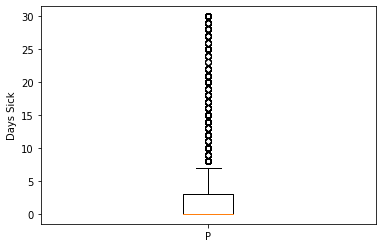

In [314]:

fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot(df['PHYSHLTH'])

# Add x-axis tick labels:
ax.set_xticklabels('PHYSHLTH')

# Add a y-axis label
ax.set_ylabel("Days Sick")

plt.show()

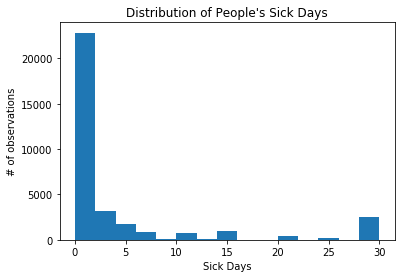

In [315]:
# graphic the distribution of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['PHYSHLTH'], bins=15)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [316]:
# code to calculate the average number of sick days by state

df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [317]:
means = df.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['Conn', 'NJ', 'NY']

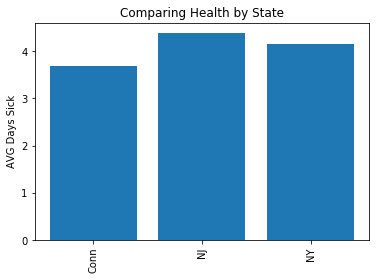

In [318]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(states, means)

# Set title and lables
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()


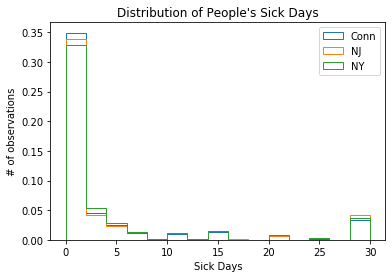

In [319]:
# graphic showing the histogram of data

fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df[df['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(df[df['_STATE']==34]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(df[df['_STATE']==36]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

# Set labels and title
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

plt.show()



## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [320]:
# code to create new colum for chronically sick

def is_Chronic(df):
    if df['PHYSHLTH'] > 10:
        return 1
    else:
        return 0
df['CHRON_SICK'] = df.apply(is_Chronic, axis=1)

In [321]:
df['CHRONIC'] = np.where(df['PHYSHLTH']>=20, 1,0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [322]:
# code to calculate averages per state
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.084414
34.0    0.106214
36.0    0.094055
Name: CHRONIC, dtype: float64

In [323]:
chronic_means = df.groupby('_STATE')['CHRONIC'].mean().values
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.084414
34.0    0.106214
36.0    0.094055
Name: CHRONIC, dtype: float64

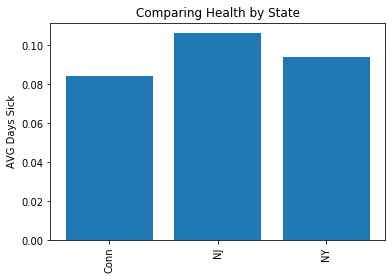

In [324]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(states, chronic_means)

# Set labels and title
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [325]:
# your code here

In [326]:
df['SMOKDAY2'].value_counts()

3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: SMOKDAY2, dtype: int64

In [327]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])

In [328]:
df['smoking'] = np.where(df['SMOKE100']==7, 7, df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9, 9, df['smoking'])

In [329]:
smoking_avg = df['smoking'].value_counts()/df['smoking'].count()
smoking_avg

3.0    0.870824
1.0    0.080689
2.0    0.041287
7.0    0.005161
9.0    0.002040
Name: smoking, dtype: float64

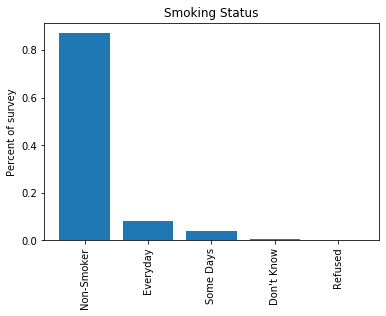

In [330]:
# code to graph those proportion of differen smoking groups using matplotlib
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

In [331]:
state_smoking = df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts = state_smoking.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [332]:
# your code here
state_pcts

smoking
_STATE smoking           
9.0    1.0       7.052243
       2.0       3.436220
       3.0      88.602537
       7.0       0.649286
       9.0       0.259714
34.0   1.0       8.143529
       2.0       4.338395
       3.0      86.722704
       7.0       0.668836
       9.0       0.126537
36.0   1.0       8.897554
       2.0       4.537398
       3.0      86.086494
       7.0       0.248139
       9.0       0.230415

In [333]:
state_pcts.unstack()

smoking                                         
smoking       1.0       2.0        3.0       7.0       9.0
_STATE                                                    
9.0      7.052243  3.436220  88.602537  0.649286  0.259714
34.0     8.143529  4.338395  86.722704  0.668836  0.126537
36.0     8.897554  4.537398  86.086494  0.248139  0.230415

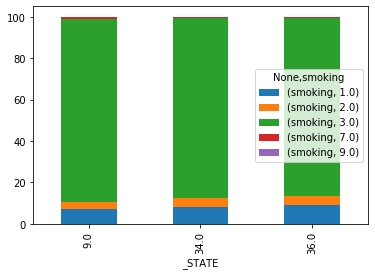

In [334]:
#graph showing the breakdown of smokers per state
state_pcts.unstack().plot(kind='bar', stacked=True)

In [335]:
zero_dict = {3:'non', 
            2: 'some',
            1: 'every',
            7: 'unknown',
            9: 'unknown'}

df['smoking_cat'] = df['smoking'].replace(zero_dict)

In [336]:
state_smoking_cat = df.groupby(['_STATE', 'smoking_cat']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts_cat = state_smoking_cat.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts_cat.index.set_levels(['Conn', 'NJ', 'NY'], level=0, inplace=True)
state_pcts_cat

smoking
_STATE smoking_cat           
Conn   every         7.052243
       non          88.602537
       some          3.436220
       unknown       0.909000
NJ     every         8.143529
       non          86.722704
       some          4.338395
       unknown       0.795372
NY     every         8.897554
       non          86.086494
       some          4.537398
       unknown       0.478554

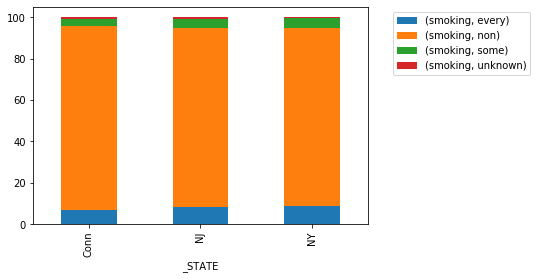

In [337]:
ax = state_pcts_cat.unstack().plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

In [338]:
cat_avg = df.groupby('smoking_cat')['PHYSHLTH'].mean()
cat_std = df.groupby('smoking_cat')['PHYSHLTH'].std()
cat_avg

smoking_cat
every      6.653007
non        3.764435
some       6.295659
unknown    4.081545
Name: PHYSHLTH, dtype: float64

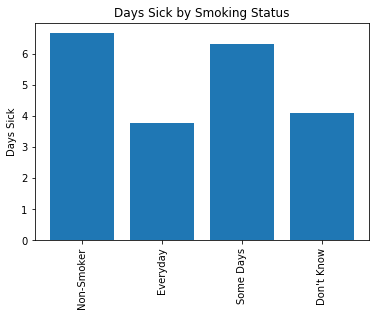

In [339]:
# code to graph these averages sick days for ea
# ch category of smoking status
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unkonw"], cat_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [340]:
# code here to clean up the ALCDAY5 responses
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            }

df['alcohol'] = df['ALCDAY5'].replace(alc_dict)


In [341]:
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min((x-100)*4.34524, 30)
    else:
        return x

In [342]:
#descriptive statistics of cleaned data

In [343]:
df['alcohol']= df['alcohol'].apply(calc_monthly)

/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


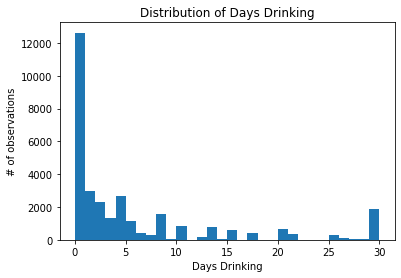

In [344]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['alcohol'], bins=30)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [345]:
# code to calculate averages per state


In [346]:
# Code to calculate correlation of between number of dirnks of number of days physically ill

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

Here I will get the population (dataset) sigma and mean

In [347]:
from scipy import stats
import math
sick_days_sigma = df['PHYSHLTH'].std()
sick_days_mean = df['PHYSHLTH'].mean()

Now I will find the corresponding z score for a standard normal distribution for 95% confidence

In [348]:
z_score_for_95_confidence = stats.norm.ppf(.975)

Now we need to use the above information to calculate the interval for which we are 95% confident that the population mean will fall in that range
 
We can calculate this by simply deducting the z score equivelant from our mean and the same just adding it

In [349]:
lower_interval = sick_days_mean - (z_score_for_95_confidence * (sick_days_sigma/math.sqrt(len(df['PHYSHLTH']))))
higher_interval = sick_days_mean + (z_score_for_95_confidence * (sick_days_sigma/math.sqrt(len(df['PHYSHLTH']))))

confidence_interval = (lower_interval,higher_interval)
confidence_interval

(3.9945111797832156, 4.17617065860242)

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In other words, between which two numbers can I be 95% sure that the mean of chronically people will be within that range.
 
To do this, I will see what z score of a standard normal contains 95% of population and multiply (apply) that to this populations sigma over the sqrt of n
then i can add that and deduct that to find the interval

In [350]:
chronic_mean = df['CHRONIC'].mean()
chronic_sigma = df['CHRONIC'].std()
chronic_n = len(df['CHRONIC'])
chronic_z = z_score_for_95_confidence * (chronic_sigma/math.sqrt(chronic_n)) 
                                         
chron_lower_interval = chronic_mean - chronic_z
chron_higher_interval = chronic_mean + chronic_z

In [351]:
chronic_intervals = (chron_lower_interval, chron_higher_interval)
chronic_intervals

(0.09207698773683823, 0.09833993821213502)

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


1. What is the probability of getting this sample mean for days physically ill, if the population mean is 4?

The test statistic in this case is my sample mean

In [352]:
print('the sample mean of sick days is :',sick_days_mean)

the sample mean of sick days is : 4.085340919192817


to answer this we must first calculate our z score (how far away our sample is from the population mean using the z-score metric)
 
This is our __Test Satatistic__

In [353]:
z_1 = (sick_days_mean - 4)/(sick_days_sigma/math.sqrt(len(df['CHRONIC'])))

In [354]:
z_1

1.8415238127148346

The z score will tell me the percentage of data that fell up until this sample mean, thus to get the probability of our sample mean occuring we are doing 1 - this z score 

In [355]:
p_val = 1 - stats.norm.cdf(z_1)
print('my p value is :', p_val)

my p value is : 0.03277241713645718


For a two tailed test and a confidence level of 95% our critical value will be .025

step 4 evaluate the test statistic (the z score above which translates to the p value 1- z score) agaisnt the critical value so 0.03390424998823416 > .025 thus to answer step five the probabilty of this outcome occuring at random is greater than our threshold to reject the null hypothesis, so we fail to reject our null hypothesis

2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?

- The null  hypothesis is that the mean of male sick days = to mean of female sick days.
 
- The alternative hypothesis is that the mean of male sick days is not equal to mean of female sick days.

- Since we have two data sets the appropiate test will be a two tailed two sample t test

In [356]:
# Dropping columnns for those who refused to specify sex
df.drop(df[df['SEX'] == 9].index,inplace=True)

In [357]:
male_sick_days = df[df['SEX'] == 1]['PHYSHLTH']
female_sick_days = df[df['SEX'] == 2]['PHYSHLTH']

male_mean = male_sick_days.mean()
female_mean = female_sick_days.mean()

male_std = male_sick_days.std()
female_std = female_sick_days.std()

len_of_m_n = len(male_sick_days)
len_of_f_n = len(female_sick_days)

In [358]:
numer = male_mean - female_mean
denom = math.sqrt(((male_std**2)/len_of_m_n)+((female_std**2)/len_of_f_n))
numer/denom

-7.384412969212864

In [359]:
stats.norm.cdf(-7.384412969212864)

7.656373903685546e-14

Finding the tests statistics and the p - value

In [360]:
stats.ttest_ind(male_sick_days,female_sick_days, equal_var=False)

Ttest_indResult(statistic=-7.384412969212337, pvalue=1.567871684086161e-13)

In [361]:
1.567871684086161e-13 < .025

True

Determining the critical value for the 95% confidence interval, since we have a two tailed t- test our critical value for a 95% confidence is .025

since we see above that our P val is way smaller than our threshold, we reject our null hypothesis. In other words if our null hypothesis were true the probability that this difference in means was a random occurance is super super small.
Yes there is a statistically significant difference

- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 

*1. Write down the null and alternative hypothesis you are testing.* 
 
 
null H is that there is no significant diff between any of the states
alternative H is there is a statistical significant difference between either one of the states

*2. Select the appropriate test and calculate the test statistic and P-values.*
 

I will be conducting 3 separate two sample t tests


In [362]:
CT = df[df['_STATE'] == 9]['PHYSHLTH']
NJ = df[df['_STATE'] == 34]['PHYSHLTH']
NY = df[df['_STATE'] == 36]['PHYSHLTH']

t1 = stats.ttest_ind(CT,NJ,equal_var=False)
t2 = stats.ttest_ind(CT,NY,equal_var=False)
t3 = stats.ttest_ind(NY,NJ,equal_var=False)
print(t1,t2,t3)

Ttest_indResult(statistic=-6.048417176322921, pvalue=1.486528432185917e-09) Ttest_indResult(statistic=-4.185906324884667, pvalue=2.8512950428758818e-05) Ttest_indResult(statistic=-2.0369717797159352, pvalue=0.04166422711848298)


In [363]:
print('since the p value for CT vs NJ is: ',t1[1] < .025,' \nwe reject the null hypothesis and there is statistical evidence for an alternative hypothesis')
print('since the p value for CT vs NY is: ',t2[1] < .025,' \nwe reject the null hypothesis and there is statistical evidence for an alternative hypothesis')
print('since the p value for NY vs NJ is: ',t3[1] < .025,' \nwe FAIL to reject the null hypothesis and there is NO statistical evidence for an alternative hypothesis')

since the p value for CT vs NJ is:  True  
we reject the null hypothesis and there is statistical evidence for an alternative hypothesis
since the p value for CT vs NY is:  True  
we reject the null hypothesis and there is statistical evidence for an alternative hypothesis
since the p value for NY vs NJ is:  False  
we FAIL to reject the null hypothesis and there is NO statistical evidence for an alternative hypothesis



*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

In [433]:
p_hat = df['CHRONIC'].mean()
p_zero = .1
n = len(df['CHRONIC'])
z = (p_hat - p_zero) / (np.sqrt((p_zero * (1-p_zero))/n))
stats.norm.cdf(z)

0.0015550670807646843

In [430]:
p_hat = df['CHRONIC'].mean()
sigma_phat = np.sqrt((p_hat*(1-p_hat))/len(df['CHRONIC']))
z_score = (p_hat - .1)/sigma_phat
z_score
stats.norm.cdf(z_score)

0.001252937433189753

In [431]:
t_crit = stats.t.ppf(1-.05,degrees_f)
true_prop = .10
chronic_count = df.groupby('CHRONIC')['CHRONIC'].count().sum()
chronic_prop = df.groupby('CHRONIC')['CHRONIC'].count()[1]/chronic_count
sample_sigma = df['CHRONIC'].std()
degrees_f = len(df['CHRONIC'])-1      
numer = chronic_prop - true_prop
denom = sample_sigma/math.sqrt(len(df['CHRONIC']))
t_statistic = numer / denom
p_val = stats.t.cdf(t_statistic,degrees_f)
t_crit, p_val

(1.6448988063648964, 0.0012540633835580752)

In [432]:
t_crit = stats.t.ppf(1-.05,degrees_f)
true_prop = .10
chronic_count = df.groupby('CHRONIC')['CHRONIC'].count().sum()
chronic_prop = df.groupby('CHRONIC')['CHRONIC'].count()[1]/chronic_count
sample_sigma = df['CHRONIC'].std()
degrees_f = len(df['CHRONIC'])-1      
numer = chronic_prop - true_prop
denom = math.sqrt(true_prop*((1-true_prop)/len(df['CHRONIC'])))
t_statistic = numer / denom
p_val = stats.t.cdf(t_statistic,degrees_f)
t_crit, p_val

(1.6448988063648964, 0.0015561438771788329)

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.